# Pandas (iv)

## 1. Transpose

Transpose is a mathematical operation on a matrix.  

The operation is to flip coumns and rows.

It is done by using the `dataframe.T` operation.

**Demonstration**

In [ ]:
original = pd.DataFrame([
    [1,1,3,4],
    [2,2,5,8]
])
original

In [ ]:
original.T

## 2. Pivot and melt

In the following example, the dataframe is a "flatted", "melted" or "unpivoted" state.

There is a name to describe it as "OLAP cube".

This is the most common form of data in big data storage.

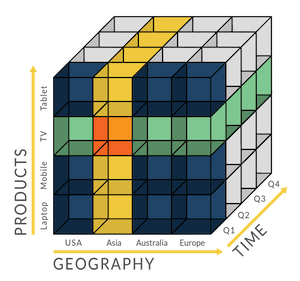

An OLAP cube can contain > 3 dimensions.  Thus we will store it in a flattened form.

In an OLAP cube, we can identify columns into `Dimensions` and `Metrics`

**Demonstration**

- Store - Dimension
- Dept - Dimension
- Date - Dimension
- IsHoliday - Dimension (derived from Date)
- Weekly_Sales - Metrics


In [ ]:
# Type your code here
import pandas as pd
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1kbCDXONvf8Bn4kEW1ssmxdJLDHC-oV-E&export=download")
df.head()

### 2.1 Pivot

Pivot is to tranform the flattened form into a 2d grid.

#### 2.1.1 `pd.pivot_table()`

The pd.pivot_table() is the general form of pivoting that involves 2 steps
1. Aggregation
2. Rearrange values

In [ ]:
pd.pivot_table(df, index="Dept", columns="Store", values="Weekly_Sales", aggfunc=sum)

#### 2.1.2 df.pivot()

If we do not need any aggregation during the pivoting, we can use the `df.pivot()` function directly.

In [ ]:
aggreated = df.groupby(['Store', 'Dept'])['Weekly_Sales'].sum().reset_index().rename(columns={"Weekly_Sales": "Total_Sales"})
aggreated

In [ ]:
# Now we use .pivot directly

aggreated.pivot(index="Dept", columns="Store", values="Total_Sales")

#### 2.1.3 series.unstack()

There's a chance that we have a multi-index series that we want to pivot directly.

In [ ]:
aggregated_srs = df.groupby(['Dept', 'Store'])['Weekly_Sales'].sum().rename({"Weekly_Sales": "Total_Sales"})
pivoted = aggregated_srs.unstack()
pivoted

### 2.2 Reverse the pivot process

#### 2.2.1 .stack()

`.stack()` can be use to reverse the pivot process.

In [ ]:
pivoted.stack()

#### 2.2.2 .melt()

If the dimension columns is not the index, we may use `.melt()` instead.

In [ ]:
dept_is_in_a_column = pivoted.reset_index()
dept_is_in_a_column

In [ ]:
# Now we melt it.

dept_is_in_a_column.melt(id_vars="Dept")